<a href="https://colab.research.google.com/github/GreenGrasshopper28/digit-recognizer/blob/main/part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


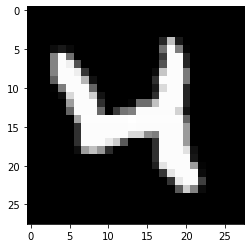

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[20],cmap='gray')


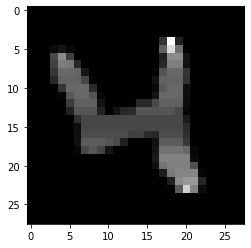

In [ ]:
x_train=keras.utils.normalize(x_train)
import matplotlib.pyplot as plt
plt.imshow(x_train[20],cmap='gray')


In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#from keras.utils import to_categorical()
#to_categorical(y_train[0])
import tensorflow as tf
tf.keras.utils.to_categorical(y_train[0])

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2362 - accuracy: 0.9309
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0942 - accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0627 - accuracy: 0.9810
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0438 - accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9903


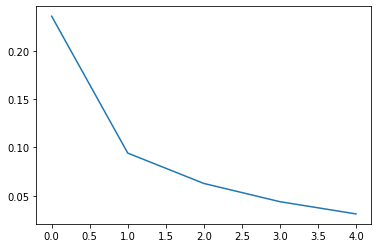

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_train,y_train))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0211 - val_accuracy: 0.9936
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0127 - val_accuracy: 0.9965
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0095 - val_accuracy: 0.9972
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0073 - val_accuracy: 0.9978
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0092 - val_accuracy: 0.9970
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0131 - val_accuracy: 0.9957
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0065 - val_acc

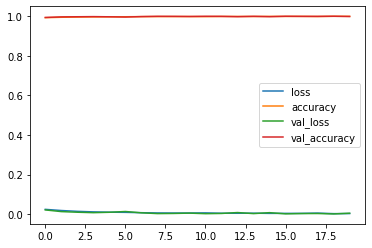

In [ ]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
import numpy as np
y_pred=model.predict(x_test)  # classification gives output in form of probability
y_pred=np.argmax(y_pred,axis=1) # 
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 968,    0,    0,    0,    0,    1,    2,    2,    2,    1],
       [   0, 1120,    0,    0,    0,    1,    2,    0,    0,    2],
       [   1,    6, 1017,   10,    6,    1,    3,   22,    3,    1],
       [   1,    1,    3,  985,    0,    3,    0,    7,    7,    3],
       [   0,    1,    2,    0,  970,    1,    8,    7,    5,   21],
       [   2,    1,    0,    7,    0,  873,    6,    0,    5,    3],
       [   3,    4,    1,    0,    2,    3,  932,    0,    0,    1],
       [   2,    1,    3,    0,    0,    0,    2,  975,    1,    2],
       [   3,    1,    5,    2,    0,    7,    3,    4,  948,    1],
       [   0,    0,    1,    6,    4,    2,    0,   11,    3,  974]])

In [ ]:
accuracy_score(y_pred,y_test)

0.9762

In [ ]:
model.save('DIGIT.hdf5')